<h1>Game Analysis - Integrated Project 1</h1>

In [1]:
# import streamlit as st
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('games.csv') #import your dataset

print(df.describe(include='object'))#describe dataset
df.info()#info from dataset
display(df.head(10))
display(df.sample(10))
display(df.tail(10))#sample data

                               Name Platform   Genre User_Score Rating
count                         16713    16715   16713      10014   9949
unique                        11559       31      12         96      8
top     Need for Speed: Most Wanted      PS2  Action        tbd      E
freq                             12     2161    3369       2424   3990
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 no

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9564,All-Star Baseball 2004,XB,2003.0,Sports,0.10,0.03,0.00,0.00,74.0,8.4,E
3800,Terminator Salvation,PS3,2009.0,Shooter,0.13,0.28,0.01,0.10,43.0,3.9,T
9885,Akiba's Trip: Undead & Undressed,PS4,2014.0,Action,0.08,0.00,0.01,0.02,NaN,NaN,NaN
9873,Medarot 4: Kabuto / Kuwagata Version,GB,2001.0,Role-Playing,0.00,0.00,0.12,0.00,NaN,NaN,NaN
9399,Injustice: Gods Among Us,PSV,2013.0,Fighting,0.09,0.00,0.00,0.03,NaN,NaN,NaN
5527,Harry Potter and the Half-Blood Prince,PS3,2009.0,Action,0.15,0.12,0.00,0.05,66.0,7.1,E10+
13650,Doraemon: Shin Nobita no Daimakyou Peko to 5-n...,3DS,2014.0,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN
2209,Naruto Shippuden: Ultimate Ninja Storm 3,PS3,2013.0,Fighting,0.32,0.32,0.15,0.15,77.0,7.9,T
6704,Medabots AX: Metabee,GBA,2002.0,Role-Playing,0.18,0.07,0.00,0.00,NaN,NaN,NaN
9163,Monster House,GC,2006.0,Adventure,0.11,0.03,0.00,0.00,60.0,tbd,E10+


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Decribe here what you notice about the dataset: missing, duplicated, data types, etc.

This dataset contains information about video games. The dataset consists of 16,715 entries and 11 columns, including Name, Platform, Year_of_Release, Genre, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score, and Rating. The data types are a mix of float64 (6 columns) and object (5 columns). There are missing values in several columns: Year_of_Release has 16,446 non-null entries (269 missing), Critic_Score has 8,137 non-null entries (8,578 missing), User_Score has 10,014 non-null entries (6,701 missing), and Rating has 9,949 non-null entries (6,766 missing). The dataset does not appear to have explicit duplicate rows, as each game title, platform, and year combination is unique; however, some names might be repeated with different platforms.

In [3]:
df.columns = df.columns.str.lower() #make columns lower case
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [4]:
missing_percentage = df.isnull().mean() * 100 #missing values percentage
missing_values = df.isnull().sum()#missing values and how to handle them
print(missing_values)
print(missing_percentage)


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64


It looks like the missing values in Year_of_Release, Critic_Score, and User_Score and Rating columns are significant. We will handle these missing values by replacing them with the mean value for the respective columns and 'tbd' for the scores. The rating column I will use the mode value to fill in the missing values because the mode is a more robust measure of central tendency than the mean.

In [5]:
df['user_score'].replace('tbd', np.nan, inplace=True)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') #replace 'tbd' with NaN and convert to numeric
df['user_score'].fillna(df['user_score'].mean(), inplace=True)#handle missing values in user_score column by replacing 'tbd' with NaN and converting to numeric.
df['user_score'] = df['user_score'].astype(float) #convert user_score column to float type
print(df['user_score'].isnull().sum()) #check missing values in user_score

df['critic_score'].replace('tbd', np.nan, inplace=True)
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce') #replace 'tbd' with NaN and convert to numeric
df['critic_score'].fillna(df['critic_score'].mean(), inplace=True) #critic_score missing values with mean for critic_score column
df['critic_score'] = df['critic_score'].astype(float) #convert critic_score to float type
print(df['critic_score'].isnull().sum()) #check missing values in critic_score column
print(df.dtypes) #check data types after conversion

0
0
name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


I converted user_score and critic_score to float type, as the user_score was an object type, and 'tbd' was used to indicate that the score was not yet available.

In [6]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y', errors='coerce') #convert year_of_release to datetime and handle

df.dropna(subset=['year_of_release'], inplace=True) #drop missing values from year_of_release column

df['rating'].fillna(df['rating'].mode()[0], inplace=True) #fill missing values with mode for rating column

print(df['year_of_release'].isnull().sum())#check missing values
print(df.dtypes) #check data types after handling missing values and conversion

0
name                       object
platform                   object
year_of_release    datetime64[ns]
genre                      object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
critic_score              float64
user_score                float64
rating                     object
dtype: object


I converted the year_of_release column to datetime type and handled missing values by dropping rows with missing values. I also filled missing values in the rating column with the mode value.

In [7]:
df_duplicates = df[df.duplicated()]#duplicated values and how to handle them
df_specific_columns = df[df.duplicated(subset=['name', 'platform', 'year_of_release'])]#specific

display(df_duplicates) #print duplicated values
display(df_specific_columns) #print specific columns

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993-01-01,NaN,0.0,0.00,0.03,0.0,68.967679,7.125046,E
16230,Madden NFL 13,PS3,2012-01-01,Sports,0.0,0.01,0.00,0.0,83.000000,5.500000,E


In [8]:
df_aggregate = df.groupby(['name', 'platform','year_of_release', 'genre', 'rating']).agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum', 'critic_score':'mean', 'user_score':'mean'}).reset_index()

print(df_aggregate) #print aggregated values

                               name platform year_of_release         genre  \
0                    Beyblade Burst      3DS      2016-01-01  Role-Playing   
1                 Fire Emblem Fates      3DS      2015-01-01  Role-Playing   
2              Frozen: Olaf's Quest      3DS      2013-01-01      Platform   
3              Frozen: Olaf's Quest       DS      2013-01-01      Platform   
4        Haikyu!! Cross Team Match!      3DS      2016-01-01     Adventure   
...                             ...      ...             ...           ...   
16438    thinkSMART: Chess for Kids       DS      2011-01-01          Misc   
16439                  uDraw Studio      Wii      2010-01-01          Misc   
16440  uDraw Studio: Instant Artist      Wii      2011-01-01          Misc   
16441  uDraw Studio: Instant Artist     X360      2011-01-01          Misc   
16442  ¡Shin Chan Flipa en colores!       DS      2007-01-01      Platform   

      rating  na_sales  eu_sales  jp_sales  other_sales  critic

I decided to handle the duplicates by aggregating the values in the columns where duplicates occur. This is because I believe that its the best way to ensure the most comprehensive view of the data.

In [9]:
df_aggregate['total_sales'] = df_aggregate[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)#calculate the total sales in all regions and add it as a new column

display(df_aggregate.sample(10)) #print aggregated values with total sales column


,name,platform,year_of_release,genre,rating,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
14366,The Sims 3: World Adventures,PC,2009-01-01,Simulation,T,0.02,0.18,0.00,0.38,81.000000,8.000000,0.58
15532,WWE All Stars,X360,2011-01-01,Fighting,T,0.18,0.14,0.00,0.03,75.000000,7.200000,0.35
2232,Coded Arms: Contagion,PSP,2007-01-01,Shooter,T,0.05,0.00,0.00,0.01,56.000000,6.600000,0.06
8934,NBA 08,PS3,2007-01-01,Sports,E,0.12,0.00,0.00,0.01,63.000000,6.000000,0.13
11124,Reign of Fire,PS2,2002-01-01,Shooter,M,0.13,0.10,0.00,0.03,56.000000,7.000000,0.26
4674,Ford Racing 3,GBA,2005-01-01,Racing,E,0.04,0.02,0.00,0.00,68.967679,7.125046,0.06
2034,Champions: Return to Arms,PS2,2005-01-01,Role-Playing,T,0.32,0.25,0.00,0.08,77.000000,8.800000,0.65
1224,BioShock The Collection,PS4,2016-01-01,Shooter,M,0.10,0.19,0.02,0.06,84.000000,8.500000,0.37
15235,Ultimate Game Room,DS,2009-01-01,Misc,E,0.03,0.00,0.00,0.00,68.967679,7.125046,0.03
9450,Naruto: Ninja Council 3,DS,2006-01-01,Action,E10+,0.39,0.00,0.00,0.03,56.000000,6.500000,0.42


<h2> Analyze Data</h2>

<i>Look at how many games were released in different years. Is the data for every period significant?</i>

I will first look at the number of games released each year by parsing the year_of_release column. Then I will count the number of games released each year. Then use statistical tests to determine if the data for every period is significant.

Null: Hypothosis: The number of games released each year is not significantly different from each other.

Hypothesis: The number of games released each year is significantly different from each other.



In [10]:
game_release_counts = df_aggregate['year_of_release'].dt.year.value_counts().sort_index() #count the number of games released each year and sort by year

print(game_release_counts) #print the number of games released each year



year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: int64


In [11]:
df['year_of_release'] = pd.to_datetime(df['year_of_release']).dt.year

In [12]:

game_release_per_year = df['year_of_release'].value_counts().sort_index()#count the number of game released 
mean_game_release_counts = game_release_counts.mean()#calculate the mean
t_stat, p_value = stats.ttest_1samp(game_release_per_year, mean_game_release_counts)#perform the ttest 

t_stat, p_value

(0.0010922138029650272, 0.9991345697187667)

In [13]:
alpha = 0.05 #significance level

if p_value < alpha:
    print('Reject the null hypothesis: The number of games released each year is significantly different from each other.')
else:
    print('Fail to reject the null hypothesis: The number of games released each year is not significantly different from each other.')
    

Fail to reject the null hypothesis: The number of games released each year is not significantly different from each other.


The p value is greater than the significance level (0.05), so we fail to reject the null hypothesis. This means the mean number of games released each year is not significantly different from the overall mean.

In [14]:
# from scipy.stats import chisquare
# observed_frequencies = game_release_per_year.values#observed frequencies
# #expected frequencies
# expected_frequencies = np.full_like(observerd_frequencies, fill_value=len(df) / len(game_release_per_year))
# #perfor the chi-square test
# chi_stat, p_value = chisquare(observed_frequencies, expected_frequencies)
# chi2_stat, p_value

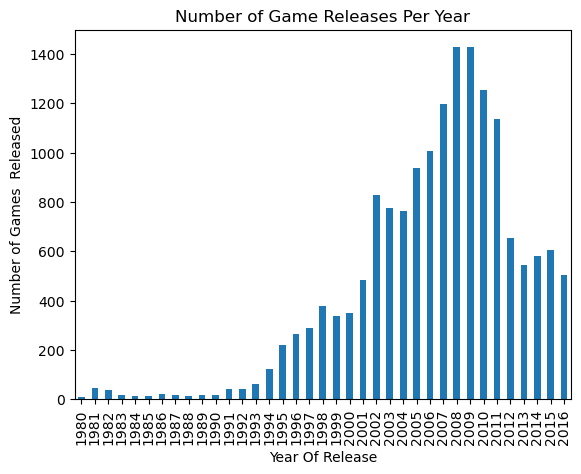

In [15]:

#visualize the data

game_release_per_year.plot(kind='bar')
plt.xlabel('Year Of Release')
plt.ylabel('Number of Games  Released')
plt.title('Number of Game Releases Per Year')
plt.show()

<i>Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?</i>

To analyze how sales varied from platform to platform and identify trends in platform popularity, I will: 
1. Calculate the total sales for each platform.
2. build sales distribution for each year for each platform. Then examine if there are any platforms that used to be popular but now have zero sales.
3. indentify platforms that used to be popular but now have zero sales in recent years.
4. Analyse the lifespan of platforms. I will analyze this by looking at how long it generally takes for new platforms to appear and old ones to fade.

In [18]:
total_sales_by_platform = df_aggregate.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
total_sales_by_platform

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

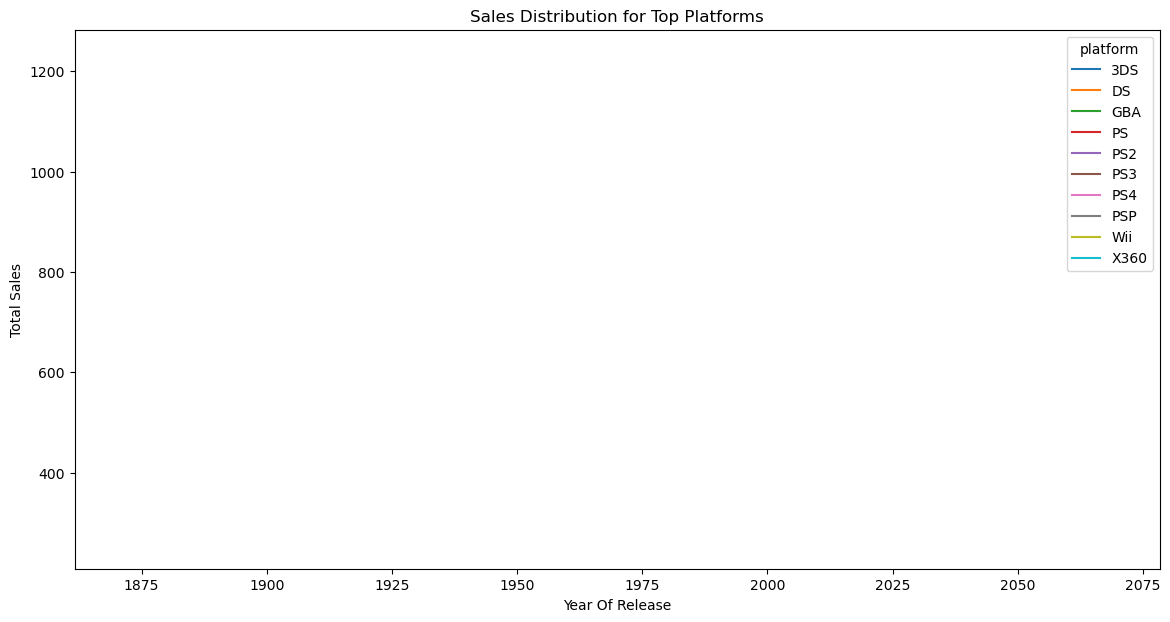

In [21]:
top_platform_data = total_sales_by_platform.head(10).index.tolist()
top_platform_data
#build sales distribution for each year for each platform
df_aggregate['year_of_release'] = pd.to_datetime(df_aggregate['year_of_release']).dt.year
#filter the data for popular platforms
top_platform_filter = df_aggregate[df_aggregate['platform'].isin(top_platform_data)]
sales_distribution = top_platform_filter.pivot_table(values='total_sales', index='year_of_release', columns='platform', aggfunc='sum', fill_value=0)
sales_distribution.plot(kind='line', figsize=(14,7))
plt.xlabel('Year Of Release')
plt.ylabel('Total Sales')
plt.title('Sales Distribution for Top Platforms')

plt.show()

Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a model for 2017.Work only with the data that you've decided is relevant. Disregard the data for previous years.

Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.


Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

Keeping your conclusions in mind, compare the sales of the same games on other platforms.

Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

<h2>Create User Profile for each region</h2>

NA: 
    1. top 5 platforms and describe variantions in their market shares from regian to region.
    2. top 5 generes  and explain the difference.
    3. Do ESRB ratings affect sales in each region?

EU: 
    1. top 5 platforms and describe variantions in their market shares from regian to region.
    2. top 5 generes  and explain the difference.
    3. Do ESRB ratings affect sales in each region?

JP: 
    1. top 5 platforms and describe variantions in their market shares from regian to region.
    2. top 5 generes  and explain the difference.
    3. Do ESRB ratings affect sales in each region?

<h2>Test The Hypotheses</h2>
1- average user ratings of the xbox one and PC platforms are the same
2- average user ratings of the action and sports genres are the same
<i>set the alpha threshold value yourself</i>
Explain:
- how you formulated your hypotheses: null and alternative hypothesis
- what significance level you chose to test the hypotheses, and why

<h2>Write a Conclusion</h2>
- Data description
  - Name
  - Platform
  - Year_of_Release
  - Genre
  - NA_Sales(USD millions)
  - EU_Sales(USD millions)
  - JP_Sales(USD millions)
  - Other_Sales(USD millions)
  - Critic_Score(max 100)
  - User_Score(max 10)
  - Rating(ESRB)